In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from river import stream
from river import cluster
from river import metrics
from river import preprocessing


In [2]:
header = ["A0", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10"]

In [3]:
data = pd.read_csv('./train_data.csv')
data.columns = header


In [4]:
data.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,368.000000,500.000000,0,0,0,0,1,0,0,5,5
1,368.000000,445.166667,0,0,0,0,1,0,1,5,5
2,346.125000,379.250000,0,0,0,0,1,1,1,5,5
3,344.900000,339.700000,1,2,2,0,1,2,1,7,6
4,380.833333,326.750000,1,2,2,0,1,2,2,7,6


# Correlation

<AxesSubplot:>

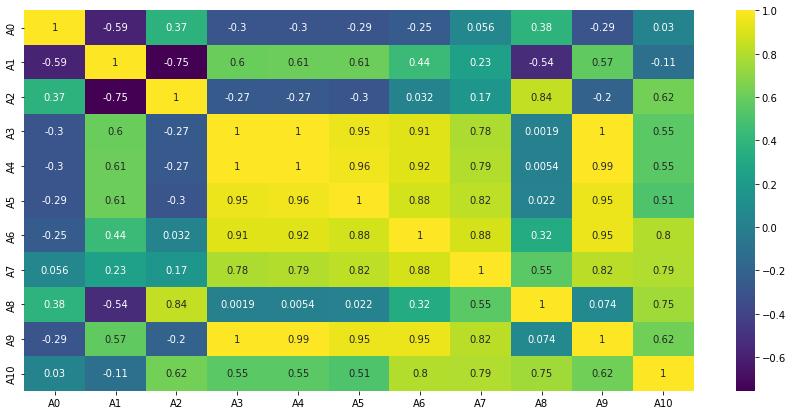

In [8]:
# correlation between feature
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(),cmap='viridis', annot=True)

# Clustering

In [14]:
silhouette_metrics = []

In [15]:
# Find the best K
for i in range(2, 11):
    k_means = cluster.KMeans(n_clusters=i, halflife=0.4, sigma=3, seed=0)
    metric = metrics.cluster.Silhouette()
    scaler = preprocessing.StandardScaler()

    for x in enumerate(stream.iter_pandas(data)):
        xi = x[1][0]
        k_means = k_means.learn_one(xi)
        y_pred = k_means.predict_one(xi)
        metric = metric.update(xi, y_pred, k_means.centers)

    silhouette_metrics.append(metric)

In [16]:
silhouette_metrics

[Silhouette: 1.,
 Silhouette: 0.031173,
 Silhouette: 0.031173,
 Silhouette: 0.031173,
 Silhouette: 0.031173,
 Silhouette: 0.031173,
 Silhouette: 0.031173,
 Silhouette: 0.031173,
 Silhouette: 0.031173]

In [18]:
k_means = cluster.KMeans(n_clusters=4, halflife=0.4, sigma=3, seed=0)
metric = metrics.cluster.Silhouette()
scaler = preprocessing.StandardScaler()

for x in enumerate(stream.iter_pandas(data)):
    xi = x[1][0]
    x_scaler = scaler.learn_one(xi).transform_one(xi)
    k_means = k_means.learn_one(x_scaler)
    y_pred = k_means.predict_one(x_scaler)
    metric = metric.update(x_scaler, y_pred, k_means.centers)

# Samve model

In [19]:
with open('model.pkl', 'wb') as f:
    pickle.dump(k_means, f)

# Load model

In [21]:
with open('./model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
model.